# FT testing
---
Testing how the size of the Fourier transformed array affects the resulting PSF

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from lib.FT_modelling import *
from tqdm.auto import tqdm

In [2]:
pupil = np.load("pupil_array.npy")
aperture = 0.1
m2_obsc = 0
chip_dim = 512
foc_length = 3.635
pix_size = 6.5e-6
x = 0
y = 0

In [3]:
# Create wavels and leakages
num_wavels = 21
wavels = np.linspace(545e-9, 645e-9, num=num_wavels)
leakages = np.ones([num_wavels])*0.02

# Generate weights
mu = wavels[num_wavels//2]
sig = num_wavels//4
a = 1/(2*np.pi*sig)
b = ((wavels-mu/sig)**2)
power = a*np.exp(-0.5*b)
weights = power/np.max(power)

In [15]:
images = []
for i in [9,10,11,12,13]:
    im = FT_model_broadband(pupil, aperture, m2_obsc, chip_dim, wavels, weights, foc_length, pix_size, 2**i, x, y, polar=False, leakages=leakages)
    images.append(im)
images = np.array(images)

In [16]:
print(images.shape)
c = images.shape[1]//2
s = 256//2
s = s//2

(5, 512, 512)


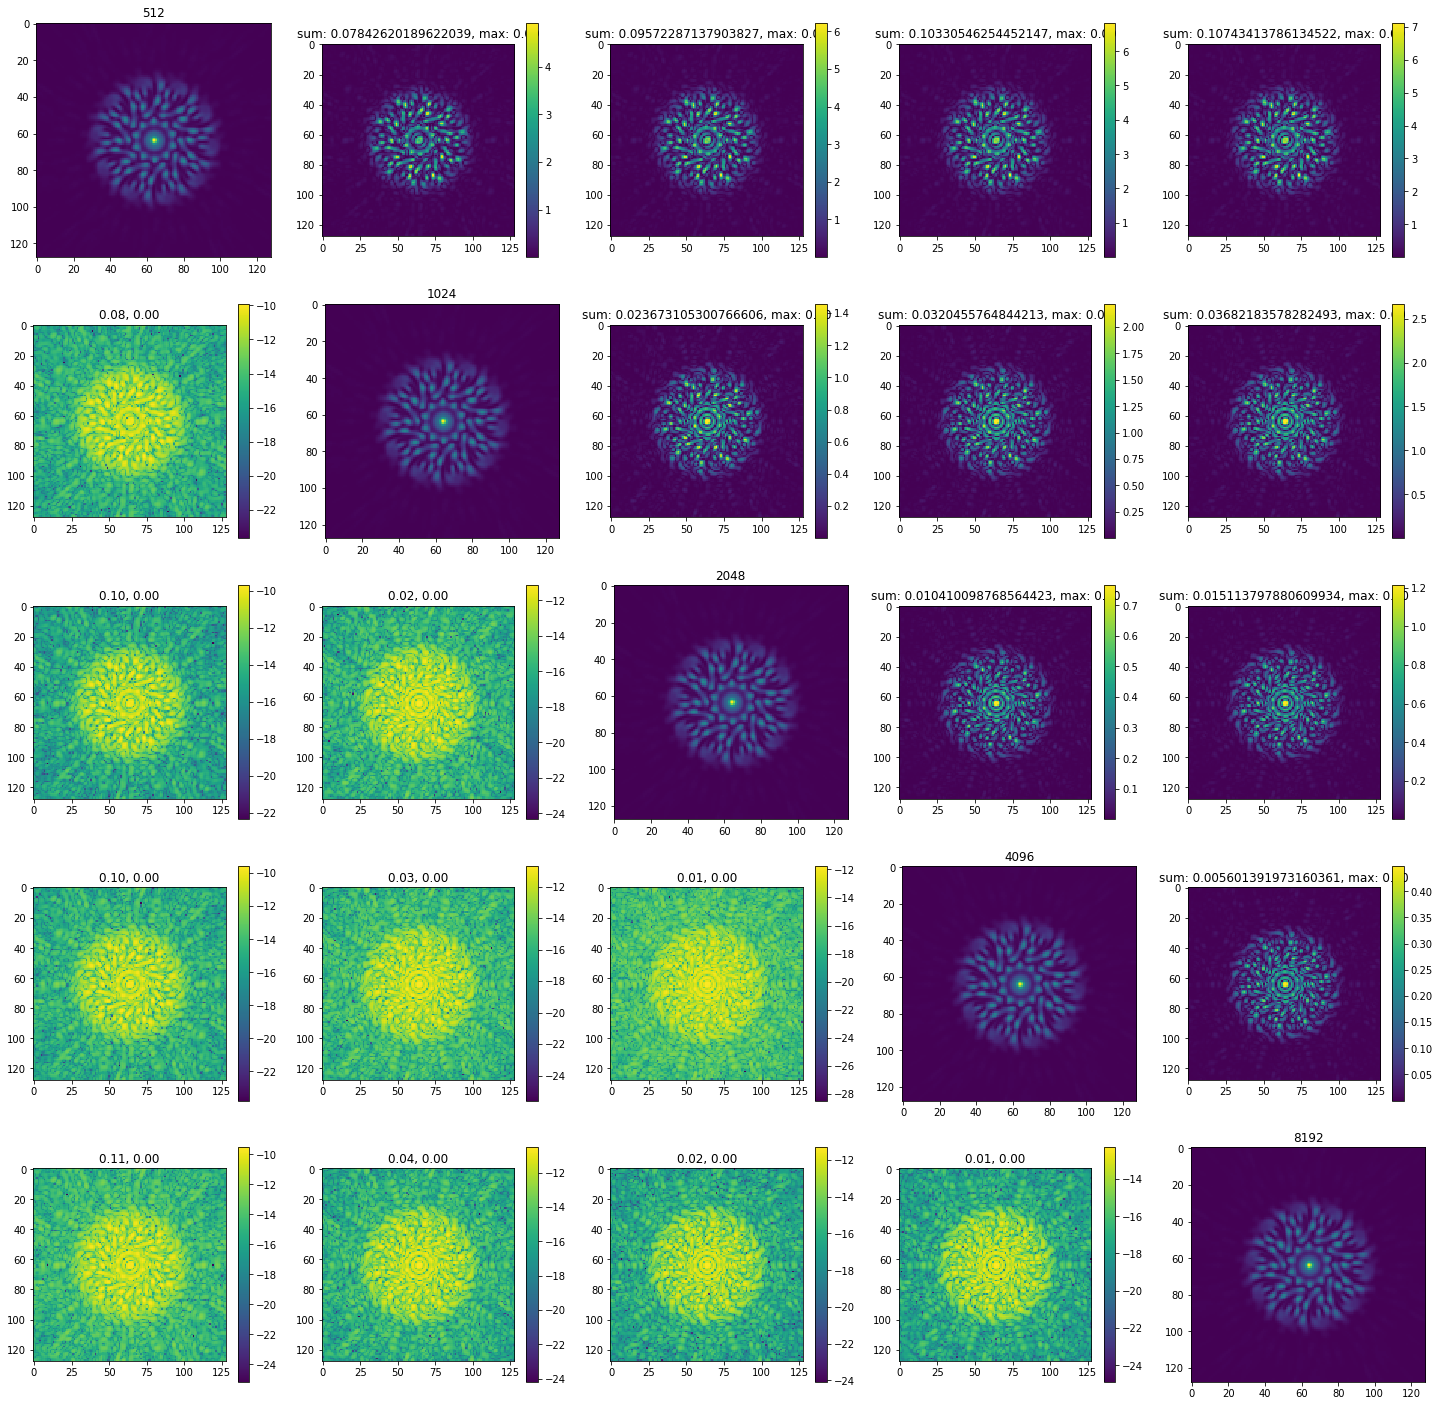

In [39]:
# plt.figure(figsize=(25,25))

# idx = 0
# for i in range(images.shape[0]):
#     for j in range(images.shape[0]):
#         idx += 1
#         plt.subplot(5,5,idx)
#         if j>i:
#             im = np.abs((images[i] - images[j]))
#             plt.imshow(im[c-s:c+s, c-s:c+s]*1e5)
# #             plt.title("sum: {:.2f}, max: {:.2f}".format(np.sum(im)*1e2, np.max(im)*1e6))
#             plt.title("sum: {}, max: {:.2f}".format(np.sum(im), np.max(im)))
#             plt.colorbar()
#         elif i == j:
#             im = np.abs(images[i])
#             plt.imshow(im[c-s:c+s, c-s:c+s])
#             plt.title(2**(i+9))
#         else:
#             im = np.abs((images[i] - images[j]))
#             plt.imshow(np.log(im[c-s:c+s, c-s:c+s]))
#             plt.title("{:.2f}, {:.2f}".format(np.sum(im), np.max(im)))
#             plt.colorbar()
        
# plt.savefig("test_image.jpg")
# plt.show()


# Show difference of sub-pixel shifting

In [ ]:
# Create wavels and leakages
num_wavels = 151
wavels = np.linspace(545e-9, 645e-9, num=num_wavels)
leakages = np.ones([num_wavels])*0.015

# Generate weights
mu = wavels[num_wavels//2]
sig = num_wavels//4
a = 1/(2*np.pi*sig)
b = ((wavels-mu/sig)**2)
power = a*np.exp(-0.5*b)
weights = power/np.max(power)

In [12]:
images = []
for i in tqdm(range(7)):
    if i == 0:
        im = FT_model_broadband(pupil, aperture, m2_obsc, chip_dim, wavels, weights, foc_length, pix_size, 2**10, x, y, polar=False, leakages=leakages)
    else:
        im = FT_model_broadband(pupil, aperture, m2_obsc, chip_dim, wavels, weights, foc_length, pix_size, 2**10, x+(10**-i), y, polar=False, leakages=leakages)
    images.append(im)
images = np.array(images)

In [15]:
print(images.shape)
c = images.shape[1]//2
s = 256//2
s = s//2

(7, 512, 512)


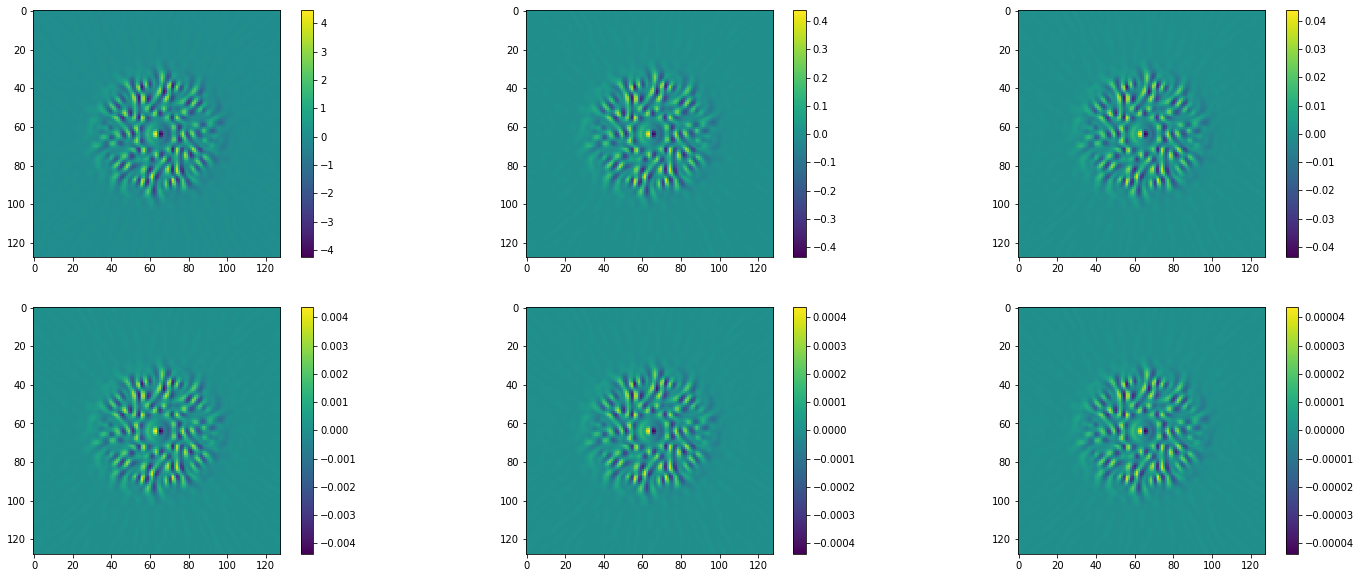

In [75]:
plt.figure(figsize=(25,10))
ims = []
ims_abs = []
idx = 1
for i in range(images.shape[0] - 1):        
    
    plt.subplot(2,3,idx)
    im_abs = np.abs((images[0] - images[i+1]))
    ims_abs.append(im_abs)
    im = (images[0] - images[i+1])
    ims.append(im)
    plt.imshow(im[c-s:c+s, c-s:c+s]*1e5)
    plt.colorbar()

    idx += 1

In [40]:
print(ims.shape)

AttributeError: 'list' object has no attribute 'shape'

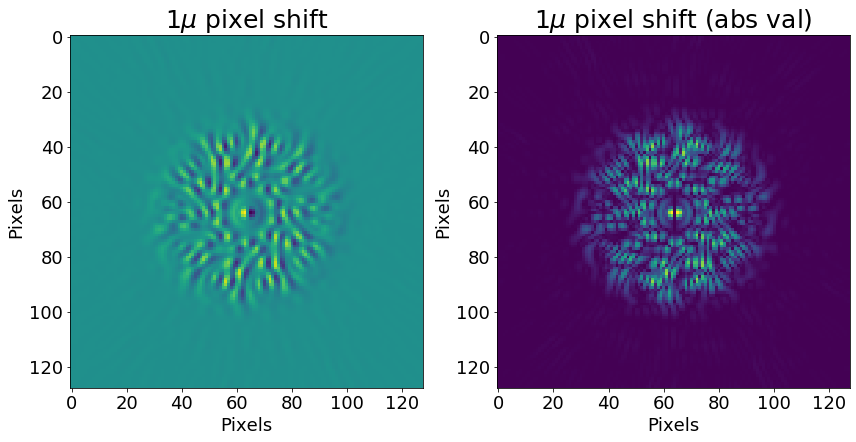

In [93]:
im1 = ims[-1]
im2 = ims_abs[-1]

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(im1[c-s:c+s, c-s:c+s]*1e10)

plt.title("1$\mu$ pixel shift", fontsize=25)
plt.xlabel("Pixels", fontsize=18)
plt.ylabel("Pixels", fontsize=18)
# plt.colorbar()
plt.xticks(size=18)
plt.yticks(size=18)

plt.subplot(1,2,2)
plt.imshow(im2[c-s:c+s, c-s:c+s]*1e10)

plt.title("1$\mu$ pixel shift (abs val)", fontsize=25)
plt.xlabel("Pixels", fontsize=18)
plt.ylabel("Pixels", fontsize=18)
# plt.colorbar()
plt.xticks(size=18)
plt.yticks(size=18)


plt.tight_layout()
plt.savefig("sub-pixel_shift.jpg")